In [162]:
%matplotlib inline
from math import sqrt, log
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv,hsv_to_rgb
import numpy as np
from numpy.linalg import norm
import pandas as pd
import pdb
from sklearn.linear_model import Lasso
import sklearn.linear_model as lm
from sklearn.preprocessing import scale
from sklearn.metrics import mean_squared_error
import seaborn as sns
from time import sleep

# Génération aléatoire

In [115]:
def gen_linear(a, b, eps, nbex):
    x = np.random.uniform(-5, 5, (nbex, len(a)))
    noise = np.random.normal(scale=eps, size=(nbex, 1))
    a = np.array(a)
    a= a.reshape(len(a),1)
    y = np.add(np.dot(x,a), noise)
    y = np.add(y, b)
    return x,y

def gen_linear_no_noise(a, b, nbex):
    x = np.random.uniform(-5, 5, (nbex, len(a)))
    a = np.array(a)
    a= a.reshape(len(a),1)
    y = np.dot(x,a)
    y = np.add(y, b)
    return x,y

In [116]:
# Parameters values
a = [1, 1, 1]
#a = [1]
b = 5
eps_0 = sqrt(1)
n = 1000


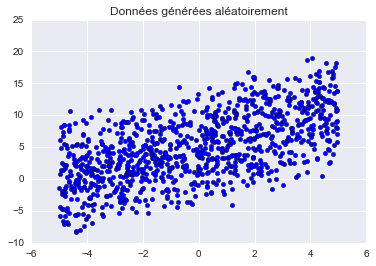

In [117]:
x, y = gen_linear(a, b, eps_0, n) 
plt.figure()
plt.scatter(x[:,0], y)
plt.title("Données générées aléatoirement")

# Données réelles : Boston Housing


In [118]:
def read_file (fn ):
    with open (fn) as f:
        names =f. readline ()
        X=np. array ([[ float (x) for x in l. strip (). split (" ")] 
                      for l in f. readlines ()])
    return X[: ,: -1] ,X[: , -1]. reshape ( -1)

In [119]:
df = read_file("housing.csv")

In [120]:
x_df, y_df = df[0], df[1]

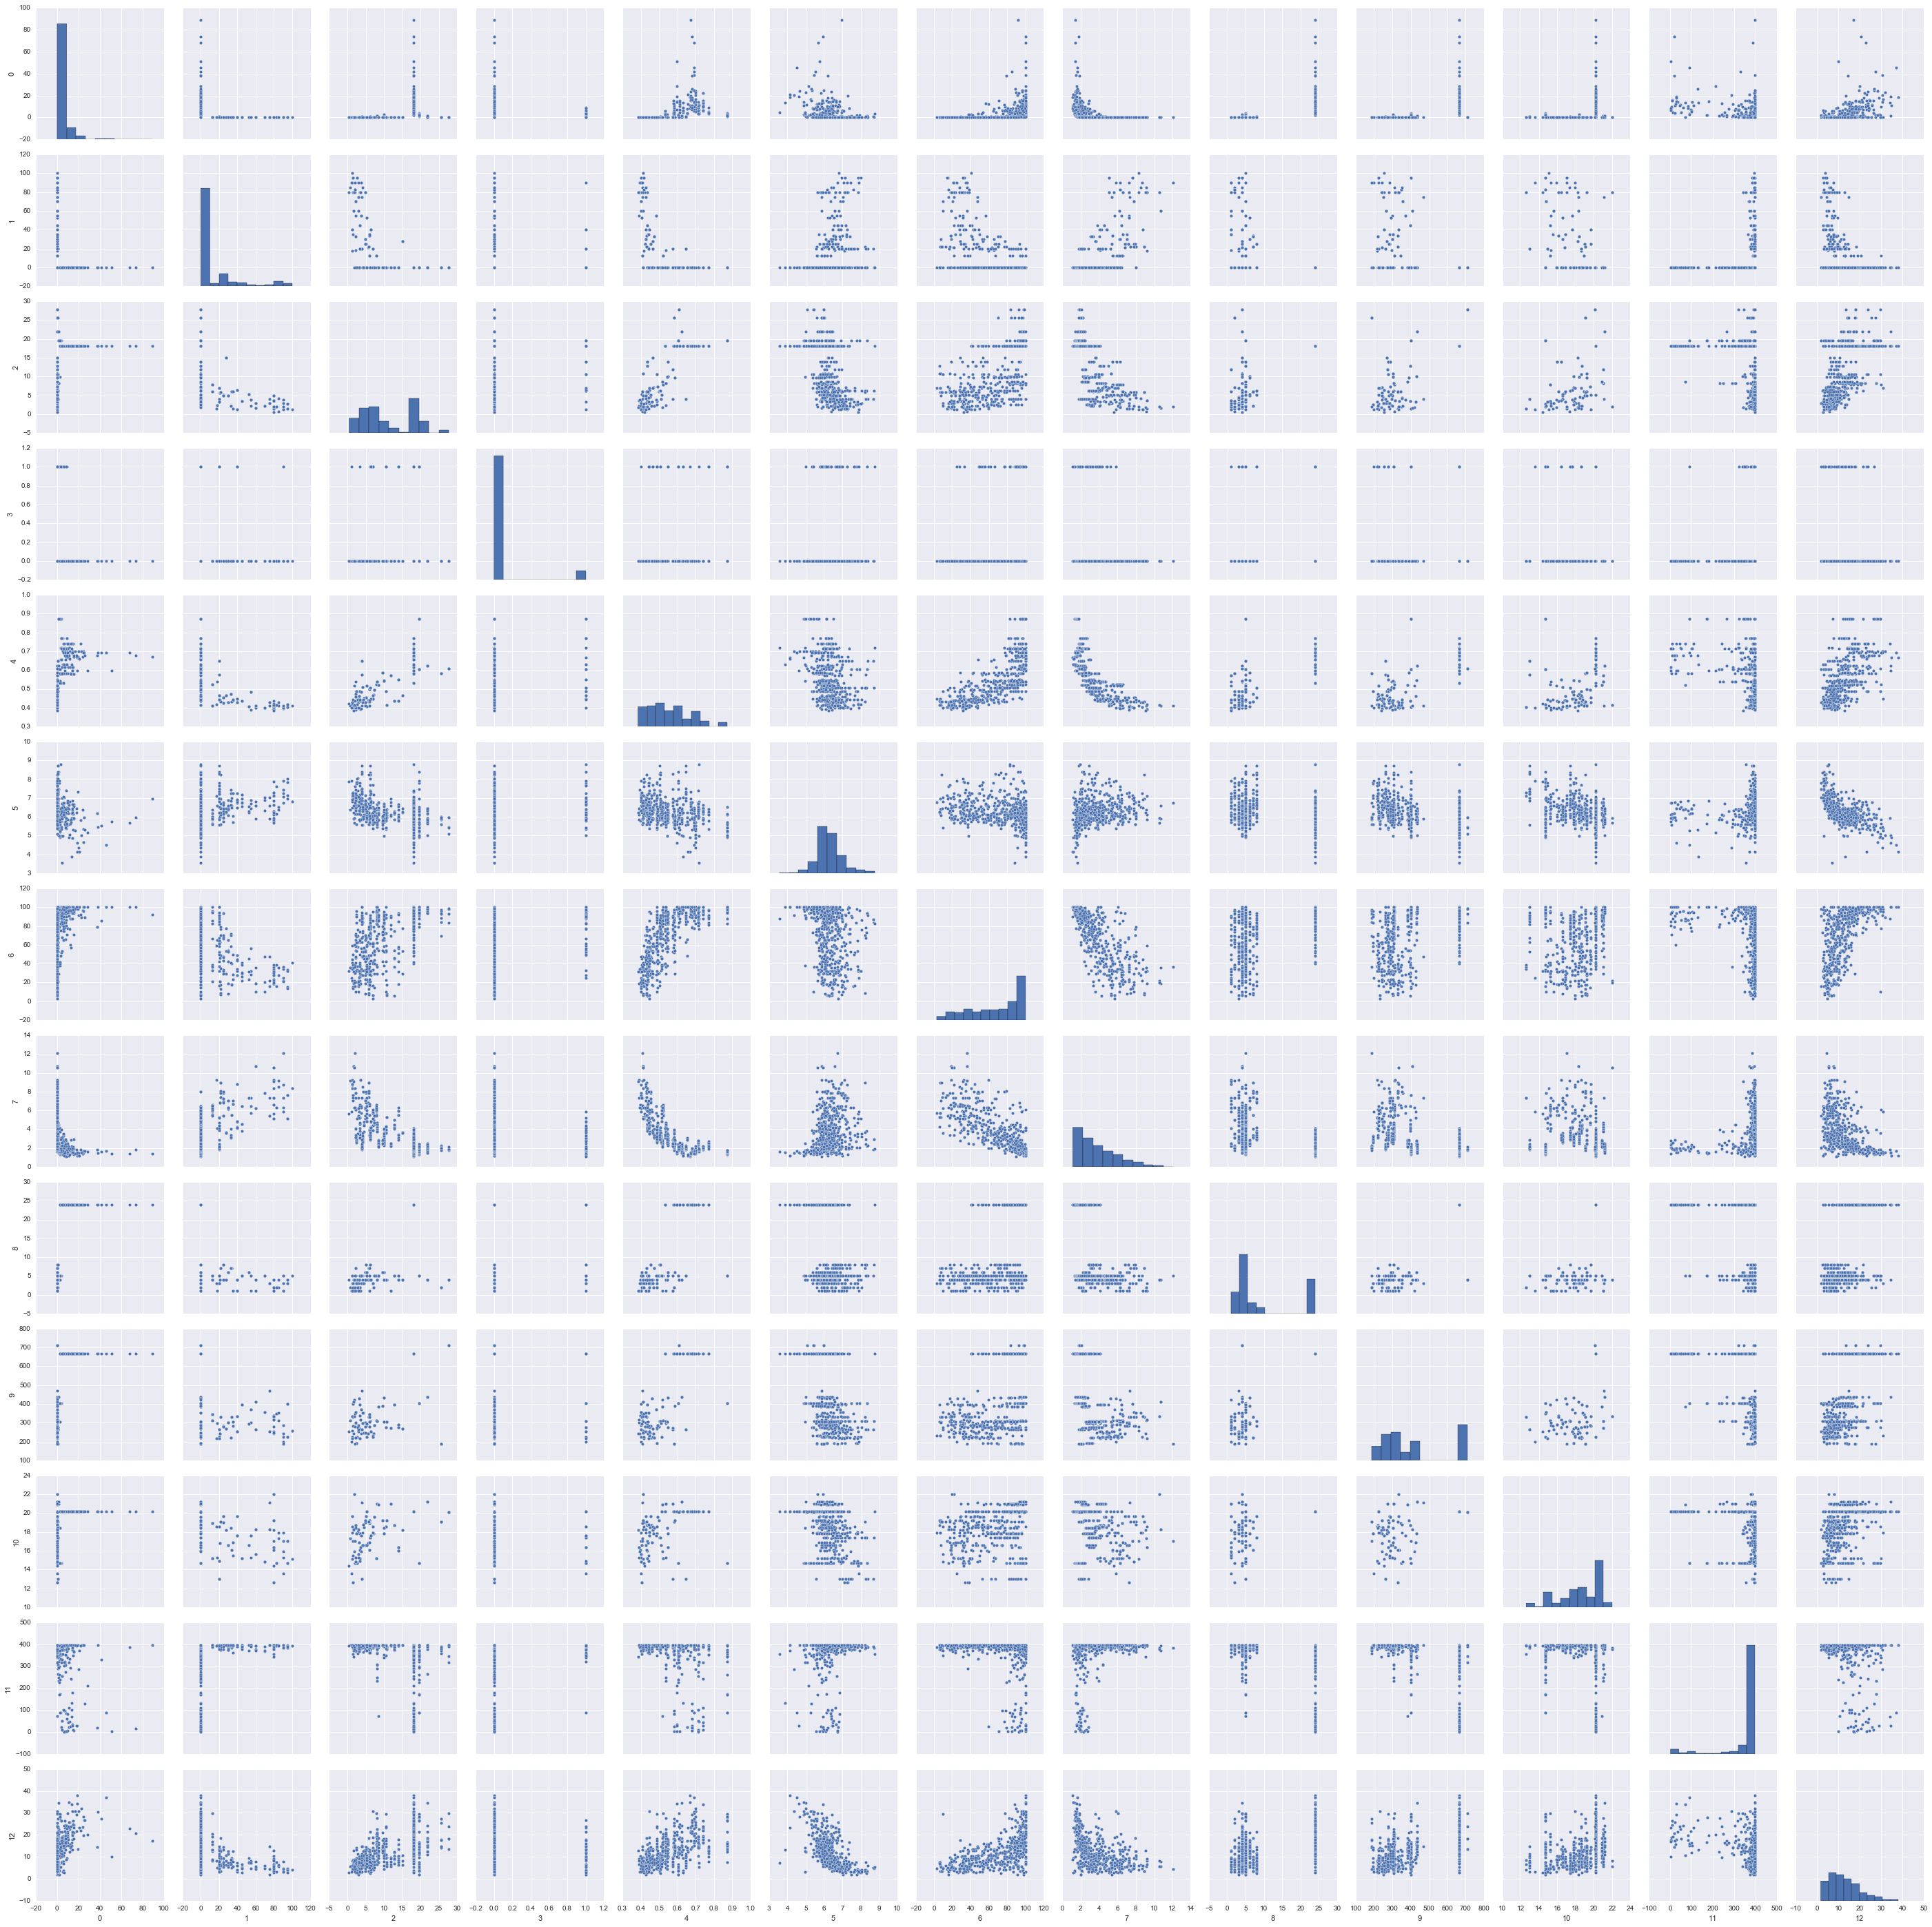

In [8]:
# Pour visualiser le diagramme de corrélations de nos données, on s'est permis d'utiliser la bibliothèqe Seaborn
# qui le fait très bien
m_df = pd.DataFrame(x_df)
sns.pairplot(m_df, size=3)

On observe que certaines données sont extrêmement corrélées, et donc que certaines variables explicatives apportent vraisemblablement la même information

# Régression linéaire

Préambule:

On écrit $x^*$ le vecteur $(1, x)$ où x est un vecteur de taille d. $x^*$ est donc un vecteur de $R^{d+1}$.

On a donc aussitôt:
$$f_w(x) = w.x^*$$

De même, si l'on note $X$ la matrice $(x^*_1, ..., x^*_N)$ où $x^*_i$ est le vecteur i généralisé on obtient:
$$f_w(X) = X \times (w_0, w_1, ..., w_d) = X \times w$$

Calcul de l'erreur des moindres carrés:

Pour tout $x,y \in X,Y$ point de la base d'apprentissage:
$$l(y, f_w(x)) = (y - f_w(x))^2$$

Donc pour l'ensemble de la base d'apprentissage:
$$R = \frac{1}{N} \sum_1^N (y_i -f_w(x_i))^2$$
$$R = \frac{1}{N} (Y-X \times w)^2 $$

On peut remarquer que ce risque est fortement convexe. L'optimum $w$ est donc obtenu là où le gradient s'annule. Après calcul, on trouve l'estimateur des moindres carrés: 

$$w = (X^TX)^{-1}X^TY$$

In [121]:
def predict(w, X):
    return np.dot(X, w)  # A tester

def mse(yhat, y):
    """Renvoit l'erreur entre yhat et y"""
    assert(len(yhat) == len(y))
    n = len(yhat)    
    return ((1/n)*(np.dot(np.transpose(y-yhat), (y-yhat))))


def regress(X, Y):
    """Renvoit l'estimateur w_hat estimateur des moindres carrés
    en régression linéaire sur la base d'apprentissage (X, Y)"""
    mat_1 = np.linalg.pinv(np.dot(np.transpose(X), X))
    mat_2 = np.dot(np.transpose(X), Y)
    return np.dot(mat_1, mat_2)

## Utilisation de la régression linéaire sur des données simulées

In [122]:
# Tout d'abord nous devons modifier x pour qu'il ait la forme attendue.
def resize(x):
    return np.hstack((np.ones(len(x)).reshape(-1, 1), x))

x_sim = resize(x)
print(x_sim[:4, :])  # Verifier que x_sim a la forme demandée
y_sim = y

[[ 1.          0.87421103  2.38938371 -0.85328955]
 [ 1.          4.2618642  -0.41952615  4.33600934]
 [ 1.         -0.0685867   0.52739023 -4.99926136]
 [ 1.          3.65017977 -1.20412248  4.21433401]]


In [165]:
w_estim = regress(x_sim, y_sim)
print(w_estim)
# On s'apercoit que l'estimateur des moindres carrés est plutôt bon et est proche du résultat attendu 
print(mse(np.dot(x_sim, w_estim), y_sim))
print(mean_squared_error(np.dot(x_sim, w_estim), y_sim))

[[ 5.00853209]
 [ 1.00261199]
 [ 0.98162682]
 [ 1.00802147]]
[[ 0.97126118]]
0.971261181634


In [124]:
# # Evolution du risque en fonction du nombre de points pour l'estimateur des moindres carrés
# nbexs = [i for i in range(1, 100)]
# risk = []
# for n in nbexs:
#     x_sim, y_sim = gen_linear_no_noise(a, b, n)
#     x_sim = resize(x_sim)
#     w_estim = regress(x_sim, y_sim)
#     risk.append(mse(np.dot(x_sim, w_estim), y_sim)[0][0])
# plt.plot(nbexs, risk)
# plt.title("Evolution du risque en fonction de la taille de l'échantillon")
# plt.xlabel("Nombre de points dans la simulation")
# plt.ylabel("Risque")

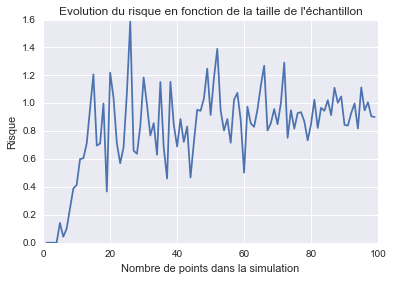

In [125]:
# Evolution du risque en fonction du nombre de points pour l'estimateur des moindres carrés
nbexs = [i for i in range(1, 100)]
risk = []
for n in nbexs:
    x_sim, y_sim = gen_linear(a, b, 1, n)
    x_sim = resize(x_sim)
    w_estim = regress(x_sim, y_sim)
    risk.append(mse(np.dot(x_sim, w_estim), y_sim)[0][0])
plt.plot(nbexs, risk)
plt.title("Evolution du risque en fonction de la taille de l'échantillon")
plt.xlabel("Nombre de points dans la simulation")
plt.ylabel("Risque")

On peut remarquer que le risque converge vers $\epsilon$, la variance du bruit gaussien. On remarque en effet que $MSE$ correspond à l'estimateur de la variance de la variable aléatoire gaussienne.

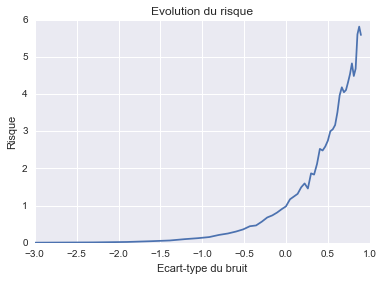

In [126]:
# Evolution du risque en fonction de la variance pour l'estimateur des moindres carrés
n = 1000
stds = [0.05*i for i in range(1, 50)]
risk = []
for std in stds:
    x_sim, y_sim = gen_linear(a, b, std, n)
    x_sim = resize(x_sim)
    w_estim = regress(x_sim, y_sim)
    risk.append(mse(np.dot(x_sim, w_estim), y_sim)[0][0])
log_stds = [log(std) for std in stds]
plt.plot(log_stds, risk)
plt.title("Evolution du risque")
plt.xlabel("Ecart-type du bruit")
plt.ylabel("Risque")

On remarque que quand l'écart-type est faible (autrement dit moins il y a de brut), le risque a tendance à tendre vers 0.
C'est logique.

In [127]:
w_true = np.array([5,1,1,1]).reshape(-1, 1)

In [128]:
# Ajout de dimensions aléatoires
x_sim, y_sim = gen_linear(a, b, 1, 500)
x_sim = resize(x_sim)
x_sim_alea = np.hstack((x_sim, np.random.rand(len(x_sim), 2)))  # Ajout de 2 dimensions aléatoires

w = regress(x_sim, y_sim)
w_alea = regress(x_sim_alea, y_sim)

print("Estimateur normal:")
print(w)
print("Ecart quadratique sur les poids")
print(np.dot(np.transpose(w-w_true), w-w_true))
print("\n \n Estimateur avec 2 dimensions d'explication aléatoires supplémentaires:")
print(w_alea)
print("Ecart quadratique sur les poids")
print(np.dot(np.transpose(w_alea[:4]-w_true), w_alea[:4]-w_true))

Estimateur normal:
[[ 5.01449857]
 [ 0.99744277]
 [ 1.00431708]
 [ 1.00741926]]
Ecart quadratique sur les poids
[[ 0.00029043]]

 
 Estimateur avec 2 dimensions d'explication aléatoires supplémentaires:
[[ 5.08661528]
 [ 0.99894911]
 [ 1.00498987]
 [ 1.00871778]
 [-0.33029353]
 [ 0.18165092]]
Ecart quadratique sur les poids
[[ 0.00760421]]


## Application à la base de données réelle

Ainsi, on remarque que l'écart quadratique sur les poids en ajoutant des dimensions a tendance a être plus grand que sans dimensions aléatoires.

In [129]:
x_train = resize(x_df)
y_train = y_df
w = regress(x_train, y_train)
print(w)

[  3.64594884e+01  -1.08011358e-01   4.64204584e-02   2.05586264e-02
   2.68673382e+00  -1.77666112e+01   3.80986521e+00   6.92224641e-04
  -1.47556685e+00   3.06049479e-01  -1.23345939e-02  -9.52747232e-01
   9.31168327e-03  -5.24758378e-01]


Interprétation des poids :
On peut grossièrement supposer que si les variables explicatives ont même ordre de grandeur, l'amplitude des coefficients reflète le poids des variables explicatives sur la variable à expliquer, et donc le degré d'information qu'elle apporte.

In [192]:
# On multiplie par 10 un des coefficients
index = 7
x_train[:, index] = 10*x_train[:, index]
w = regress(x_train, y_train)
print(w)

[ 0.00799635 -0.05826883  0.00540293 -0.00441793  0.02089406 -0.01218849
 -0.18350986 -0.00999222 -0.09264093 -0.00045912 -0.01794916 -0.05462572
 -0.01607027]


INTERPREATION A FAIRE!!!

Afin d'éviter ces problèmes, il peut être pertinent de normaliser les valeurs des paramètres.

In [193]:
# Utilisation de la fonction sklearn de la bibliothèque sklearn.preprocessing
x_normed = scale(x_df)
y_normed = scale(y_df)

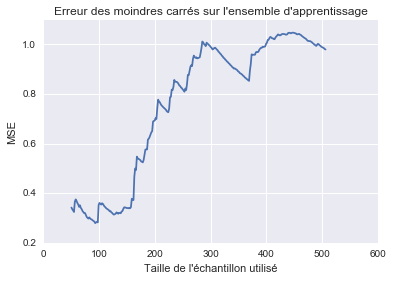

In [194]:
# Tracé de la MSE en fonction du nombre de données utilisées
np.random.shuffle(x_normed)
sizes = np.linspace(0.1*len(x_df), len(x_df), num=300)
MSE_sample = []
for size in sizes:
    size = int(size)
    w_sample = regress(x_normed[:size], y_df[:size])
    MSE_sample.append(mse(y_normed[:size], np.dot(x_normed[:size], w_sample)))

plt.plot(sizes, MSE_sample)
plt.title("Erreur des moindres carrés sur l'ensemble d'apprentissage")
plt.ylabel("MSE")
plt.xlabel("Taille de l'échantillon utilisé")

A REVOIR

Il est clair que notre protocole de validation n'est pas adapté. En effet, plus on considère de points, plus la $MSE$ augmente!
En l'état, la $MSE$ n'est donc pas une bonne statistique pour jauger de la performance de notre régression

En fait, utiliser notre ensemble d'apprentissage pour estimer l'erreur des moindres carrés n'est pas judicieux car nous avons justement utilisé cet ensemble pour fitter notre modèle. 
Pour pallier à cette faible, nous pouvons recourrir à un protocole de validation simple, en scindant notre ensemble de départ en un **ensemble d'entraînemenet** et un **ensemble de validation**

In [195]:
np.random.shuffle(x_df)

def mse_simple_valid(fraction):
    indexes = int(len(x_df)*fraction)
    x_train0, x_valid0 = x_df[:indexes], x_df[indexes:]
    y_train0, y_valid0 = y_df[:indexes], y_df[indexes:]
    x_train0 = scale(x_train0) 
    x_valid0 = scale(x_valid0)  # Pour être parfaitement rigoureux, on normalise séparément les ensembles
    y_train0 = scale(y_train0)
    y_valid0 = scale(y_valid0)
    w = regress(x_train0, y_train0)
    y_hat = predict(w, x_valid0)
    return mse(y_hat, y_valid0)

print(mse_simple_valid(0.8))

1.0400068636


D:\Programmes\Miniconda3\lib\site-packages\sklearn\preprocessing\data.py:177: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


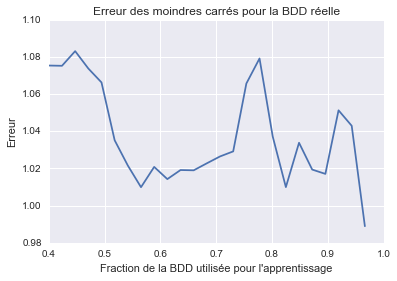

In [196]:
# Generalisation : Tracé de l'erreur des moindres carrés en fonction de la taille
# de l'ensemble d'entraînement
n_points = 25
mses = []
fracs = []
for index in range(n_points):
    frac = 0.4 + 0.59*index/n_points
    fracs.append(frac)
    mses.append(mse_simple_valid(frac))
plt.plot(fracs, mses)
plt.title("Erreur des moindres carrés pour la BDD réelle")
plt.xlabel("Fraction de la BDD utilisée pour l'apprentissage")
plt.ylabel("Erreur")

Cette fois-ci, la tendance de la courbe est cohérente avec nos attentes concernant la statistique $MSE$

In [197]:
# Création des ensembles d'entraînement/validation pour les données réelles
frac = 0.8
indexs = int(len(x_df)*frac)
x_train, x_valid = x_df[:indexs], x_df[indexs:]
y_train, y_valid = y_df[:indexs], y_df[indexs:]
x_train = scale(x_train)
x_valid = scale(x_valid)
y_train = scale(y_train)
y_valid = scale(y_valid)

In [198]:
# ... Et sur données simulées
x_sim, y_sim = gen_linear(a, b, eps_0, n)
x_sim = resize(x_sim)
indexs = int(len(x_sim)*frac)
x_sim_train, x_sim_valid = x_sim[:indexs], x_sim[indexs:]
y_sim_train, y_sim_valid = y_sim[:indexs], y_sim[indexs:]
x_sim_train = scale(x_sim_train)
x_sim_valid = scale(x_sim_valid)
y_sim_train = scale(y_sim_train)
y_sim_valid = scale(y_sim_valid)

# Ridge Regression

Il peut arriver que certaines variables explicatives soient comme pour notre base de données fortement corrélées, ou pire colinéaires.
Comme cette redondance ajoute inutilement de la complexité à notre prédiction, on veut pouvoir pénaliser ce type de complexité.
On ajoute ainsi une **pénalité** sur la norme 2 au carré de $w$ dans la fonction objectif 

La nouvelle fonction de risque s'écrit:
$$R_r = \frac{1}{N} (Y-X \times w)^2 + \lambda ||w||^2$$
où $\lambda$ est un paramètre fixé

On cherche $\hat{w}=argmin_w R_r(w)$

Encore une fois, par argument de forte convexité, l'estimateur $\hat{w}$ est obtenu au zéro du gradient de la fonction objectif. 
$$\nabla(R_r(w))=0 \Leftrightarrow -X^TY + (X^TX+2\lambda I) w = 0$$

Autrement dit, $\hat{w} = (X^TX+\lambda I)^{-1}X^TY$

In [199]:
def ridge_regress(X, Y, lmd):
    lig, col = np.shape(X)
    mat_1 = np.linalg.pinv(np.dot(np.transpose(X), X) + lmd*np.eye(col, col))
    mat_2 = np.dot(np.transpose(X), Y)
    return np.dot(mat_1, mat_2)

## Propriétés de la Ridge Regression sur des données simulées ...

EXPRESSION DE W_TRUE FAUSSE A REVOIR

In [200]:
lmds = np.logspace(-5, 2, num=100)
err_mse = []
err_w = []
for lmd in lmds:
    w_sim = ridge_regress(x_sim_train, y_sim_train, lmd)
    err_mse.append(mse(y_sim_valid, np.dot(x_sim_valid, w_sim))[0][0])
    err_w.append(norm(w_sim-w_true))

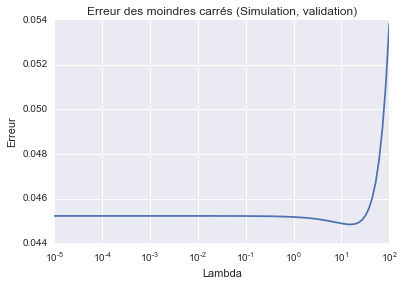

In [201]:
plt.plot(lmds, err_mse)
plt.xscale('log')
plt.title('Erreur des moindres carrés (Simulation, validation)')
plt.xlabel("Lambda")
plt.ylabel("Erreur")

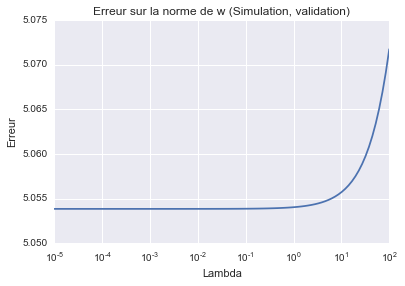

In [202]:
plt.plot(lmds, err_w)
plt.xscale('log')
plt.title('Erreur sur la norme de w (Simulation, validation)')
plt.xlabel("Lambda")
plt.ylabel("Erreur")

## ... Et sur notre base de données réelles

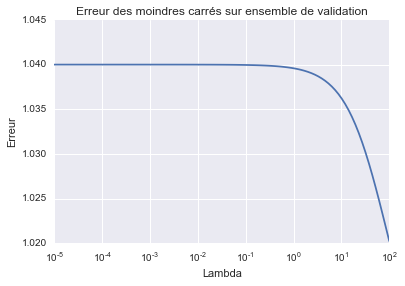

In [203]:
mse_real_ridge = []
w_ridge = []
for lmd in lmds:
    w = ridge_regress(x_train, y_train, lmd)
    w_ridge.append(w)
    mse_real_ridge.append(mse(y_valid, np.dot(x_valid, w)))
    
# Visualisation des données 
plt.plot(lmds, mse_real_ridge)
plt.xscale('log')
plt.title('Erreur des moindres carrés sur ensemble de validation')
plt.xlabel("Lambda")
plt.ylabel("Erreur")

VERIFIER QUE DANS BON SENS?

# Lasso

In [208]:
w_lasso = []
mse_real_lasso = []
for lmd in lmds:
    clf = Lasso(alpha=lmd)
    clf.fit(x_train, y_train)
    w_lasso.append(clf.coef_)
    mse_real_lasso.append(mse(y_valid, np.dot(x_valid, clf.coef_)))

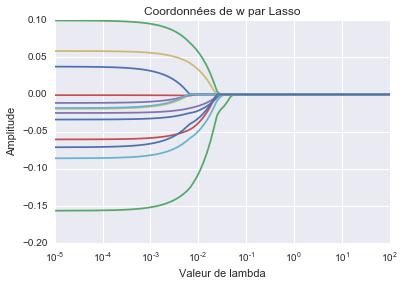

In [209]:
plt.plot(lmds, w_lasso)
plt.xscale('log')
plt.title('Coordonnées de w par Lasso')
plt.ylabel('Amplitude')
plt.xlabel('Valeur de lambda')

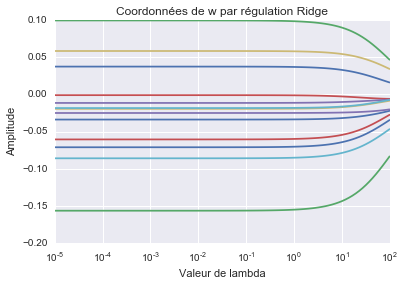

In [210]:
plt.plot(lmds, w_ridge)
plt.xscale('log')
plt.title('Coordonnées de w par régulation Ridge')
plt.ylabel('Amplitude')
plt.xlabel('Valeur de lambda')

La régularisation ridge reste valable pour des valeurs $\lambda$ supérieures à celles de la méthode par Lasso.

TODO TODO TODO TODO TODO

Envoyer un mail au prof pour lui demander pourquoi c'est si mauvais. Faut-il que je remplace?

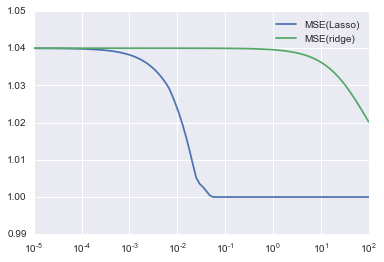

In [211]:
plt.plot(lmds, mse_real_lasso, label='MSE(Lasso)')
plt.plot(lmds, mse_real_ridge, label='MSE(ridge)')
plt.xscale('log')
plt.legend()

# Bonus

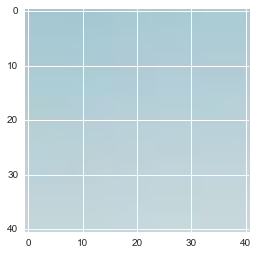

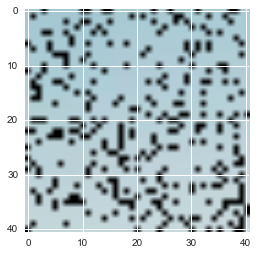

In [212]:
# Code fourni dans le TP, ne pas modifier
### Dimension du patch x-h:x+h,y-h:y+h
H = 20
### Valeur fictive pour les pixels absents
DEAD = -100
### Fichier image
IMG_FILE = "sea_small.jpg"

def build_dic(im,step=H):
    """ construction du dictionnaire : tous les patchs sans pixels morts en parcourant step by step l'image """
    res=[]
    step = step
    for i in range(0,im.shape[0],step):
        for j in range(0,im.shape[1],step):
            if inside(i,j,im) and np.sum(get_patch(i,j,im)[:,:,0]<=DEAD)==0:
                res.append(patch2X(get_patch(i,j,im)))
    return np.array(res).T

def patch2X(patch):
    """ transformation d'un patch en vecteur """
    return patch.reshape(-1)

def X2patch(X,h=H):
    """ transformation d'un vecteur en patch image"""
    return X.reshape(2*h+1,2*h+1,3)


def inside(i,j,im,h=H):
    """ test si un patch est valide dans l'image """
    return i-h >=0 and j-h >=0 and i+h+1<=im.shape[0] and j+h+1<=im.shape[1]

def get_patch(i,j,im,h=H):
    """ retourne un patch centre en i,j """
    return im[(i-h):(i+h+1),(j-h):(j+h+1)]

def remove_patch(i,j,im,h=H):
    """ Supprime le patch de l'image """
    imn= im.copy()
    imn[(i-h):(i+h+1),(j-h):(j+h+1)]=DEAD
    return imn,get_patch(i,j,im)

def noise_patch(patch,prc=0.2):
    """ Supprime des pixels aleatoirement """
    npatch = patch.copy().reshape(-1,3)
    height,width = patch.shape[:2]
    nb =int(prc*height*width)
    npatch[np.random.randint(0,height*width,nb),:]=DEAD
    return npatch.reshape(height,width,3)

def show(im,fig= None):
    """ affiche une image ou un patch """
    im = im.copy()
    if len(im.shape)==1 or im.shape[1]==1:
        im = X2patch(im)
    im[im<=DEAD]=-0.5
    if fig is None:
        plt.figure()
        fig = plt.imshow(hsv_to_rgb(im+0.5))
    fig.set_data(hsv_to_rgb(im+0.5))
    plt.draw()
    plt.pause(0.001)
    return fig

def read_img(img):
    """ lit un fichier image """
    im = plt.imread(img)
    if im.max()>200:
        im = im/255.
    return rgb_to_hsv(im)-0.5

if __name__ == "__main__":
    plt.ion()
    img = read_img(IMG_FILE)
    patch = get_patch(100,100,img)
    noisy = noise_patch(patch)
    show(patch)
    show(noisy)
    imgnew, oldpatch = remove_patch(100,100,img)

In [213]:
def build_signal(im, step=H):
    res=[]
    step = step
    for i in range(0,im.shape[0],step):
        for j in range(0,im.shape[1],step):
            if inside(i,j,im) and np.sum(get_patch(i,j,im)[:,:,0]<=DEAD)==0:
                res.append(im[i][j])
    return np.array(res)

In [ ]:
dic = build_dic(imgnew)
y = build_signal(imgnew)
print(np.shape(y))
print(np.shape(dic))


Questions à se poser:

Dans quel espace vit $w$?


In [ ]:
def denoise(patch, dic):
    # dic is already made of vectors
    
newpatch = denoise(noisy, dic)